In [1]:
import pandas as pd

C:\Users\NIHARIKA\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pp=pd.read_csv("Property_Price_Train.csv")

In [3]:
df1=pd.DataFrame(pp.isnull().sum()[pp.isnull().sum()>0])

In [4]:
df1.columns=['NullsCount']
df1=df1.sort_values('NullsCount',ascending=False)
df1

,NullsCount
Pool_Quality,1452
Miscellaneous_Feature,1405
Lane_Type,1368
Fence_Quality,1178
Brick_Veneer_Type,871
Fireplace_Quality,689
Lot_Extent,259
Garage,81
Garage_Built_Year,81
Garage_Finish_Year,81


In [5]:
l1=list(df1.index[0:6])
l1

pp=pp.drop(l1,axis=1)

In [6]:
pp=pp.drop('Id',axis=1)

In [7]:
pp.isnull().sum()[pp.isnull().sum()>0]

Lot_Extent            259
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [8]:
pp.Lot_Extent.fillna(60.0,inplace=True)

pp.Brick_Veneer_Area.fillna(0.0,inplace=True)
pp.Basement_Height.fillna('TA',inplace=True)
pp.Basement_Condition.fillna('TA',inplace=True)
pp.Exposure_Level.fillna('No',inplace=True)
pp.BsmtFinType1.fillna('Unf',inplace=True)
pp.BsmtFinType2.fillna('Unf',inplace=True)
pp.Electrical_System.fillna('SBrkr',inplace=True)

pp.Garage.fillna('Attchd',inplace=True)
pp.Garage_Built_Year.fillna(pp.Garage_Built_Year.mean(),inplace=True)
pp.Garage_Finish_Year.fillna('Unf',inplace=True)
pp.Garage_Quality.fillna('TA',inplace=True)
pp.Garage_Condition.fillna('TA',inplace=True)

C:\Users\NIHARIKA\AppData\Local\Temp\ipykernel_5668\1542776808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pp.Lot_Extent.fillna(60.0,inplace=True)
C:\Users\NIHARIKA\AppData\Local\Temp\ipykernel_5668\1542776808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [9]:
pp.select_dtypes(include='object').columns

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Exterior_Material',
       'Exterior_Condition', 'Foundation_Type', 'Basement_Height',
       'Basement_Condition', 'Exposure_Level', 'BsmtFinType1', 'BsmtFinType2',
       'Heating_Type', 'Heating_Quality', 'Air_Conditioning',
       'Electrical_System', 'Kitchen_Quality', 'Functional_Rate', 'Garage',
       'Garage_Finish_Year', 'Garage_Quality', 'Garage_Condition',
       'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
pp[pp.select_dtypes(include='object').columns]=pp[pp.select_dtypes(include='object').columns].apply(le.fit_transform)


In [12]:
[pp.select_dtypes(include='object').columns]

[Index([], dtype='object')]

In [13]:
#aim --out of 74 --73 x and 1 is y---in this x it is feature selection not sampling 
pp_x=pp.iloc[:,0:-1]

In [14]:

cols=[]
corr=[]
for i in pp_x.columns:
    cols.append(i)
    corr.append(pp_x[i].corr(pp.Sale_Price))

In [15]:
feat_imp=pd.DataFrame()
feat_imp['Features']=cols
feat_imp['Corr']=corr

In [16]:
feat_imp.head()

,Features,Corr
0,Building_Class,-0.084563
1,Zoning_Class,-0.166896
2,Lot_Extent,0.329338
3,Lot_Size,0.263843
4,Road_Type,0.041057


In [17]:
l1=list(feat_imp[(feat_imp.Corr> 0.3) | (feat_imp.Corr < -0.3)].Features)
l1.append('Sale_Price')

In [18]:
pp=pp.loc[:,l1]


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_pp,test_pp=train_test_split(pp,test_size=.2)
pp_train_x=train_pp.iloc[:,0:-1]
pp_train_y=train_pp.iloc[:,-1]
pp_test_x=test_pp.iloc[:,0:-1]
pp_test_y=test_pp.iloc[:,-1]

In [21]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(pp_train_x,pp_train_y)

LinearRegression()

In [22]:
Rsquare=lr1.score(pp_train_x,pp_train_y)#rsquare
Rsquare

0.8059016413508246

In [23]:
N=pp_train_x.shape[0]
K=pp_train_x.shape[1]

In [24]:
Adquare=1-(1-Rsquare)*(N-1)/(N-K-1)
Adquare

0.8021689806075712

In [25]:
lr1.coef_

array([-3.44843537e+01,  1.46552336e+04,  1.16624890e+02,  1.68432785e+02,
        1.61045909e+01, -4.80683236e+03, -9.68327039e+02, -7.99540844e+03,
        1.94342706e+01, -3.52444336e-01, -1.05022642e+03,  2.49837490e+01,
        1.15530936e+01,  2.22080601e+01, -2.59696495e+03, -1.02564244e+04,
        2.29544024e+03,  7.72406004e+03, -1.08741300e+03, -6.45499431e+01,
       -2.86201909e+03,  1.45679231e+04])

In [26]:
lr1.intercept_

-396837.91617065674

In [27]:
pred_train=lr1.predict(pp_train_x)# as we can see our first predicted model value is same to manuaaly one 
pred_train

array([ 75683.71731673,  93865.68241542,  85005.43235018, ...,
       298172.26399028, 128581.78850297, 152408.64817008])

In [28]:
pred_test=lr1.predict(pp_test_x)# as we can see our first predicted model value is same to manuaaly one 
pred_test

array([108129.91140587, 124375.96428346, 168876.99777623, 222354.39364725,
       287014.58044019, 234230.72625072, 198544.2014422 , 145820.45647247,
       128724.99452133, 215128.28721088, 191850.98530785, 249399.44463951,
       120498.92054648, 178264.68872866,  77379.49196003, 113491.31861864,
       355953.3140575 , 235107.11706779, 276717.15662299,  97623.97865648,
       338716.93356401, 251254.39416282, 168349.4750446 , 183964.31678256,
       190349.94653849, 189461.91180468, 184110.36951399, 137830.61068998,
        78238.11997298, 245699.59089212, 203975.99455598, 168517.15716306,
       190766.78311387, 281935.3361774 , 189287.04274211, 103187.79310785,
        80531.47885147, 114005.1505188 , 169990.17334793, 289789.41396993,
       120641.64886155, 118895.74285709, 311845.49672324, 171302.26934758,
       138293.61708019, 106003.95069421, 324503.23927499,  96603.63943328,
       273734.3359016 , 121552.29771458, 159368.10517206, 293709.7155098 ,
       203935.34077098, 1

In [29]:
actual_pred = pd.DataFrame()
actual_pred['Actual']=pp_test_y
actual_pred['Pred']=pred_test

In [30]:
err_train_pp= pp_train_y-pred_train
err_test_pp=pp_test_y-pred_test

In [31]:
err_train_pp.mean()

-1.805584683005587e-11

In [32]:
err_train_pp.skew()

-1.4409887515952216

In [33]:
err_train_pp.kurtosis()

41.94601077768473

(array([  1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   5.,  33., 185., 461., 359.,  80.,  23.,
          6.,   3.,   4.,   1.,   2.,   1.,   0.,   1.]),
 array([-466098.14892988, -441338.43119602, -416578.71346215,
        -391818.99572828, -367059.27799442, -342299.56026055,
        -317539.84252668, -292780.12479281, -268020.40705895,
        -243260.68932508, -218500.97159121, -193741.25385735,
        -168981.53612348, -144221.81838961, -119462.10065575,
         -94702.38292188,  -69942.66518801,  -45182.94745415,
         -20423.22972028,    4336.48801359,   29096.20574746,
          53855.92348132,   78615.64121519,  103375.35894906,
         128135.07668292,  152894.79441679,  177654.51215066,
         202414.22988452,  227173.94761839,  251933.66535226,
         276693.38308613]),
 <BarContainer object of 30 artists>)

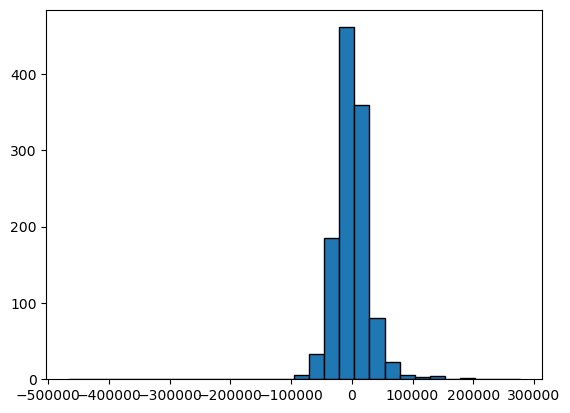

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(err_train_pp,bins=30,edgecolor='black')

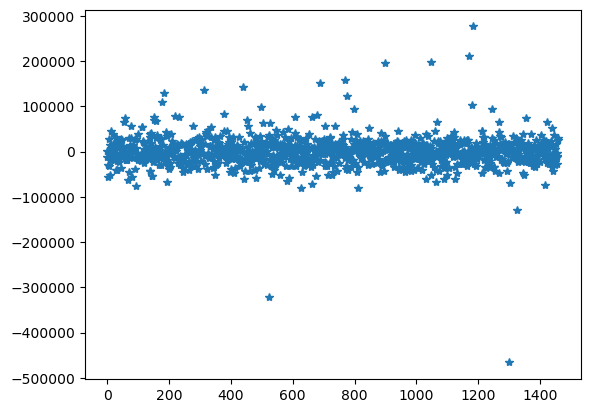

In [35]:
plt.plot(err_train_pp,'*')

<Axes: >

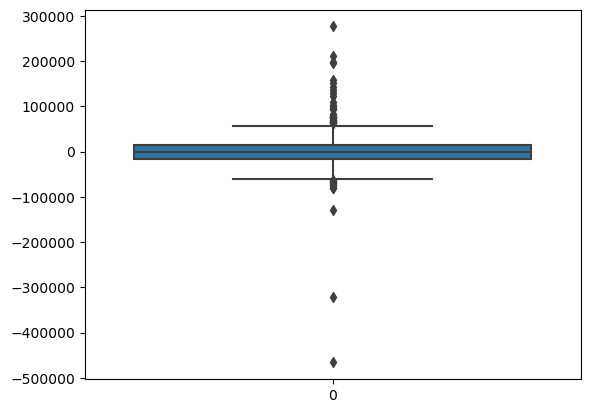

In [36]:
sns.boxplot(err_train_pp)

In [37]:
actual_pred = pd.DataFrame()#empty data frame 
actual_pred['Actual']=pp_train_y#created colum in which valu taken from train 
actual_pred['Pred']=pred_train

In [38]:
import numpy as np

In [39]:
mse_train=np.mean(np.square(err_train_pp))
mse_train

1185559108.4262795

In [40]:
mse_test=np.mean(np.square(err_test_pp))
mse_test

1229283603.880562

In [41]:
rmse_train=np.sqrt(mse_train)
rmse_train

34431.948948996185

In [42]:
rmse_train=np.sqrt(mse_train)
rmse_train

34431.948948996185

In [43]:
mape_train=np.mean(np.abs(err_train_pp*100/pp_train_y))
mape_test=np.mean(np.abs(err_test_pp*100/pp_test_y))

In [44]:
mape_train

12.710028607255468

In [45]:
mape_test

13.085765251305498

In [46]:
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1,var1
    sd=df[col].std()
    var1=[x for x in df[col]if (x>mean-k*sd)]
    var1=[x for x in df[col]if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(var1)];
    print(df1.shape)
    print("number of outliers removed -->",df.shape[0]-df1.shape[0])

In [47]:
remove_outliers(pp,'Sale_Price',2)

(1396, 23)
number of outliers removed --> 63
